# HR_Attrition_Rate_Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
data=pd.read_csv(r'C:\Users\User\Downloads\HR_Analytics.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning:-

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Above observation shows that there are no null values in this dataset.

In [7]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Above observations shows that 'Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MartitalStatus',
'Over18' and 'OverTime' are object type and rest are
integer and float type.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA:-

No     1233
Yes     237
Name: Attrition, dtype: int64


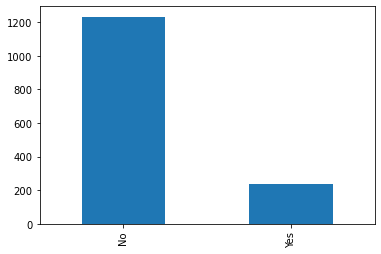

In [11]:
# Look target (Attrition) distribution

print(data["Attrition"].value_counts())
data["Attrition"].value_counts().plot(kind="bar")
plt.show()

There are five times more records in attrition-no class than in attrition-yes class, means the dataset is imbalanced.

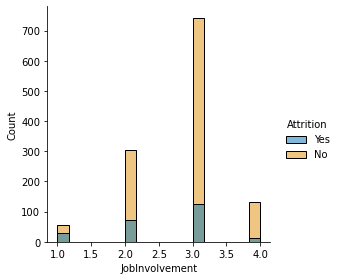

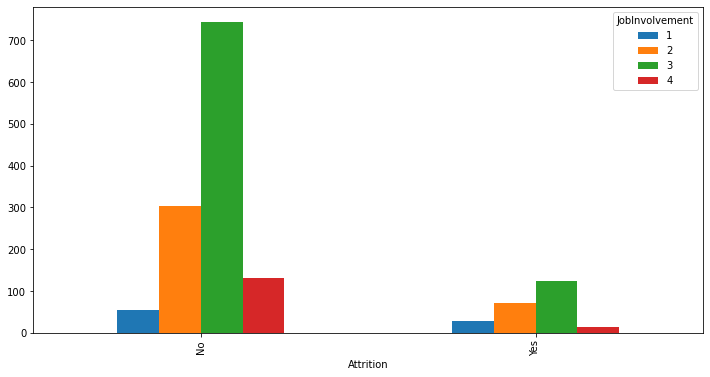

In [13]:
sns.displot(x="JobInvolvement", data=data, hue='Attrition', height=4, palette="colorblind");
pd.crosstab(data.Attrition, [data.JobInvolvement]).plot(kind="bar", figsize=(12,6));
plt.show()

Employees with low JobInvolvement quit job more often, while employees with high JobInvolvement quit job less often.

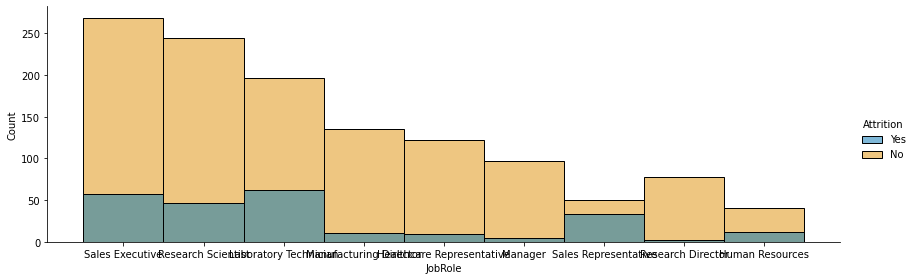

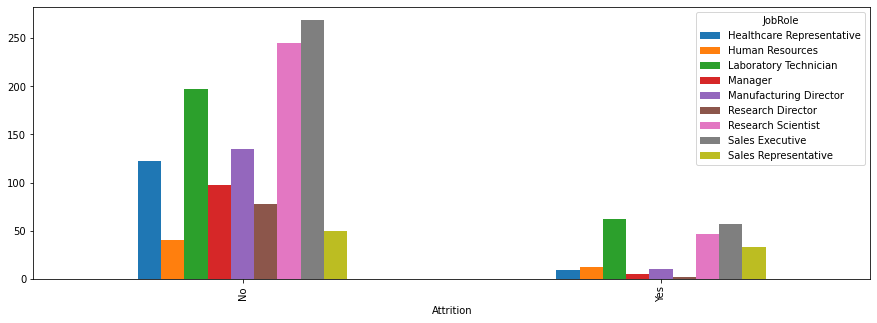

In [14]:
sns.displot(x="JobRole", data=data, hue='Attrition', height=4, aspect=3, palette="colorblind");
pd.crosstab(data.Attrition, [data.JobRole]).plot(kind="bar", figsize=(15, 5))
plt.show()

'Sales Executive','Reaseach Scientist','Laboratory Technician' quit job less often as compared to others.

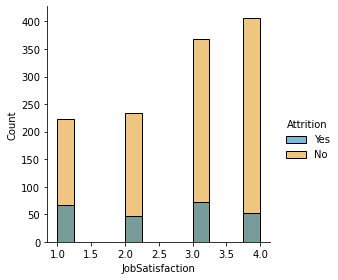

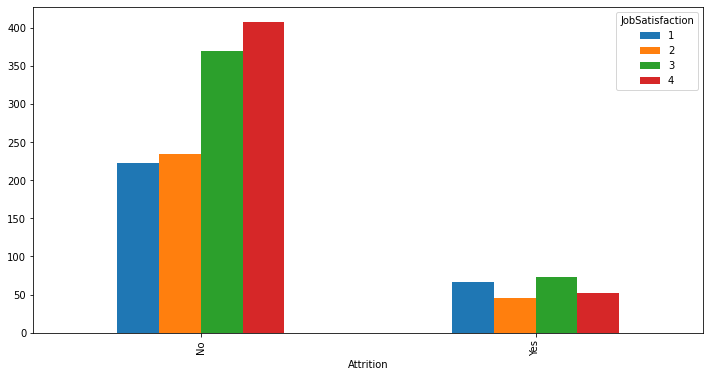

In [15]:
sns.displot(x="JobSatisfaction", data=data, hue='Attrition', height=4, palette="colorblind")
pd.crosstab(data.Attrition, [data.JobSatisfaction]).plot(kind="bar", figsize=(12,6))
plt.show()

Employees with lowest JobLevel quit job much more often. I think it's because employees haven't made career yet and they don't lose much when they leave company.

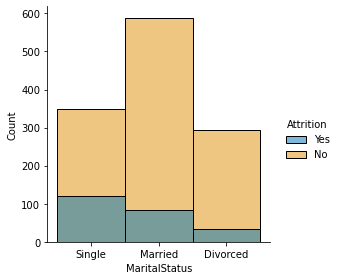

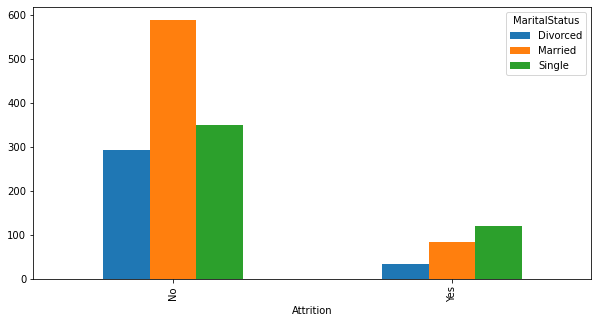

In [7]:
sns.displot(x="MaritalStatus", data=data, hue='Attrition', height=4, palette="colorblind")
pd.crosstab(data.Attrition, [data.MaritalStatus]).plot(kind="bar", figsize=(10, 5))
plt.show()

Single employees quit job more often. I think it's because married people have responsibilities and changes in their lives take longer to plan. Similar situation could be with divorced people, because thy could have kids from marriage that they are responsible for.

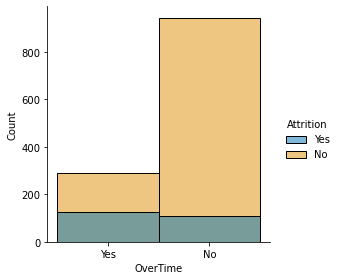

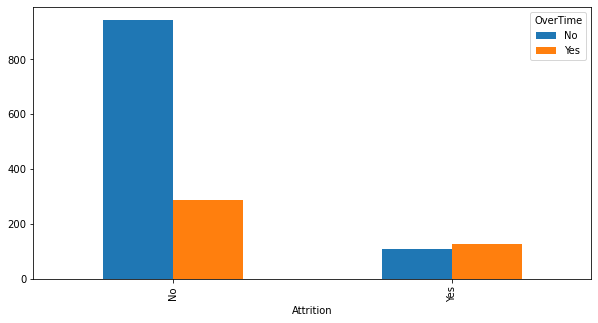

In [8]:
sns.displot(x="OverTime", data=data, hue='Attrition', height=4, palette="colorblind")
pd.crosstab(data.Attrition, [data.OverTime]).plot(kind="bar", figsize=(10, 5))
plt.show()

Employees who have overtimes quit job more often. And vice versa - employees who don't have overtimes quit job less often.

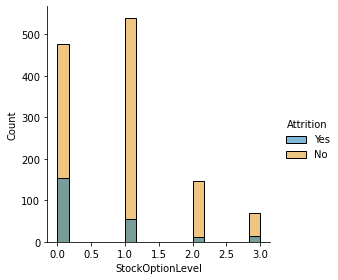

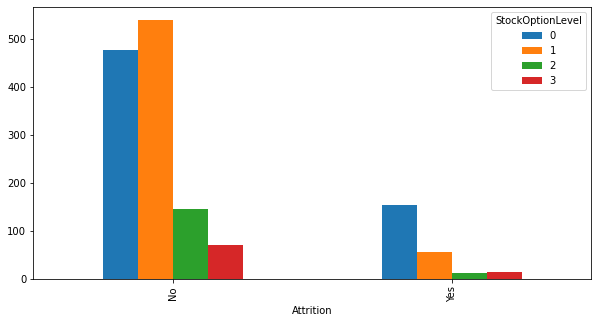

In [10]:
sns.displot(x="StockOptionLevel", data=data, hue='Attrition', height=4, palette="colorblind")
pd.crosstab(data.Attrition, [data.StockOptionLevel]).plot(kind="bar", figsize=(10, 5))
plt.show()

Employees with stocks quit job less often. Positive values of StockOptionLevel affect Attrition. It's understandable - stock options is a popular way to motivate employees. People with stocks of company they work at tend to stay in this company longer.

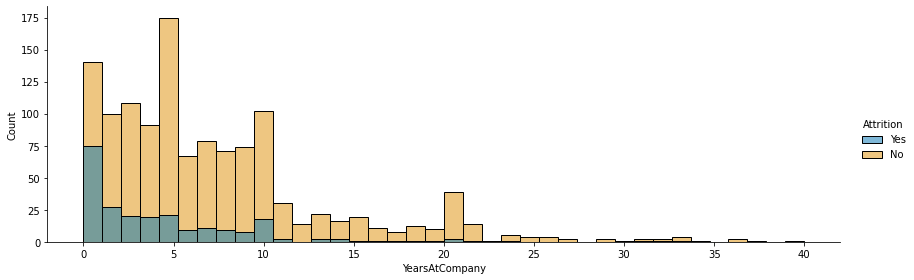

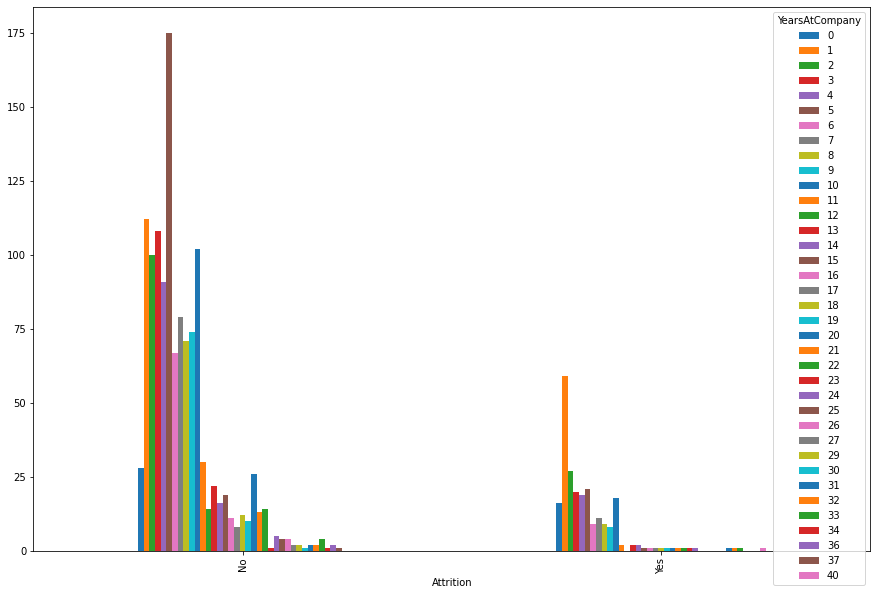

In [11]:
sns.displot(x="YearsAtCompany", data=data, hue='Attrition', height=4, aspect=3, palette="colorblind")
pd.crosstab(data.Attrition, [data.YearsAtCompany]).plot(kind="bar", figsize=(15, 10))
plt.show()

Both plots are close to normal destibution. But there is obvious difference between two graphs. They have different peaks. Attrition-Yes has large peak on 1 year while another graph doesn't have peak there. One year is enough amount of time to understand if you want to keep working in chosen company or not. It looks like many people decided to leave company.

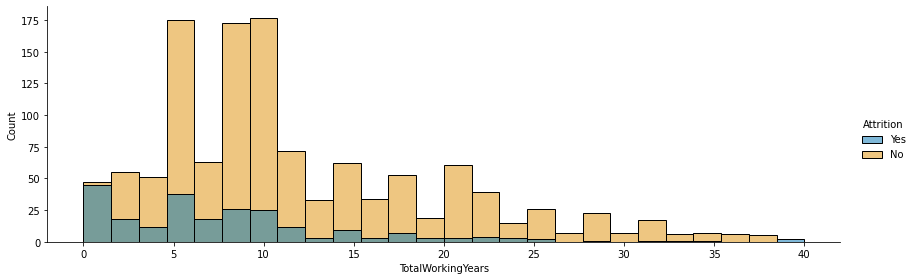

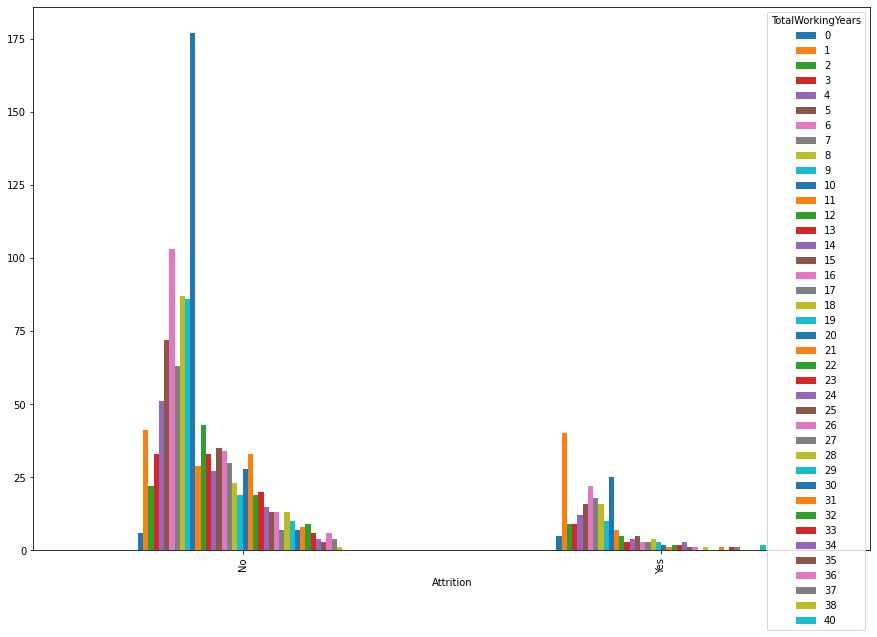

In [12]:
sns.displot(x="TotalWorkingYears", data=data, hue='Attrition', height=4, aspect=3, palette="colorblind")
pd.crosstab(data.Attrition, [data.TotalWorkingYears]).plot(kind="bar", figsize=(15, 10))
plt.show()

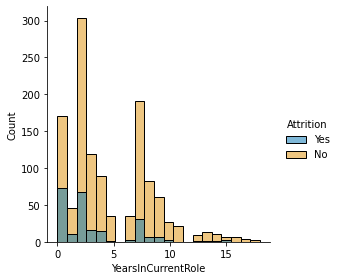

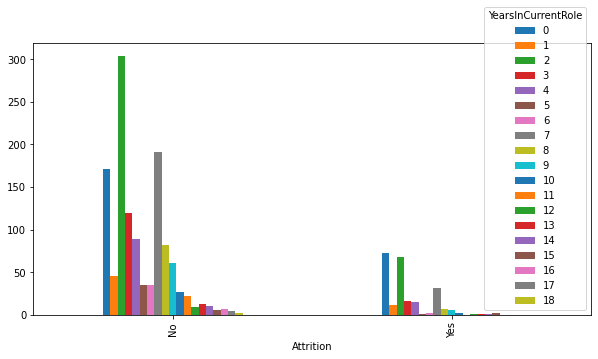

In [13]:
sns.displot(x="YearsInCurrentRole", data=data, hue='Attrition', height=4, palette="colorblind")
pd.crosstab(data.Attrition, [data.YearsInCurrentRole]).plot(kind="bar", figsize=(10, 5))
plt.show()

It looks like there is a peak on 0 years for Attririon-Yes which shouldn't be there. Probably some employees were moved on new position and didn't like it.

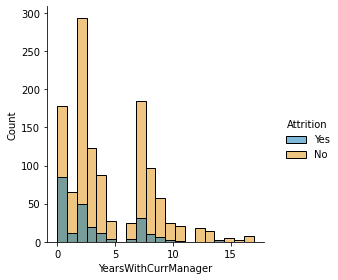

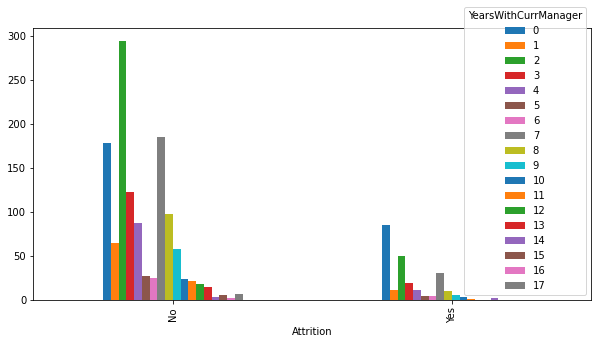

In [14]:
sns.displot(x="YearsWithCurrManager", data=data, hue='Attrition', height=4, palette="colorblind")
pd.crosstab(data.Attrition, [data.YearsWithCurrManager]).plot(kind="bar", figsize=(10, 5))
plt.show()

This graph looks very similar with previous YearsInCurrentRole with same peak on 0 years for Attrition-Yes. I think it's because managers change their positions rarely.

In [3]:
from sklearn.preprocessing import LabelEncoder

val= ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime","Over18"] 

encoder = LabelEncoder()
for i in  val:
    data[i] = encoder.fit_transform(data[i])

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Correlation:-

In [92]:
# Checking the Correlation with respect to target variable(Attrition):-

data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

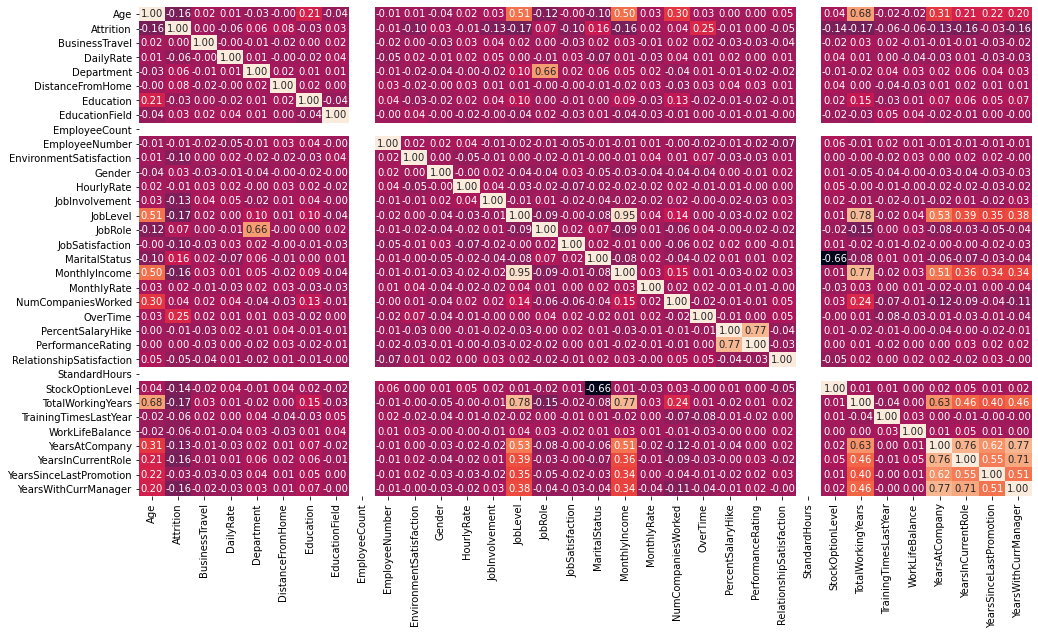

In [73]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above correlation shows that 'WorkLifeBalance','TrainingTimesLastYear','DailyRate',
'RelationshipSatisfaction','YearsSinceLastPromotion','HourlyRate','BusinessTravel',
'PerformanceRating','DistanceFromHome','Gender','NumCompaniesWorked'are less correlated with the output variable.

In [5]:
# Drop the less correlalted/non-relevant columns;

data=data.drop(['WorkLifeBalance','TrainingTimesLastYear','DailyRate', 'RelationshipSatisfaction','YearsSinceLastPromotion',
                'HourlyRate','BusinessTravel','PerformanceRating','DistanceFromHome','Gender','NumCompaniesWorked',
                'EmployeeCount','StandardHours','Over18'],axis=1)
data

,Age,Attrition,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,1,1,2,3,2,7,...,2,5993,19479,1,11,0,8,6,4,5
1,49,0,1,1,1,2,3,2,2,6,...,1,5130,24907,0,23,1,10,10,7,7
2,37,1,1,2,4,4,4,2,1,2,...,2,2090,2396,1,15,0,7,0,0,0
3,33,0,1,4,1,5,4,3,1,6,...,1,2909,23159,1,11,0,8,8,7,0
4,27,0,1,1,3,7,1,3,1,2,...,1,3468,16632,0,12,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,2,3,2061,3,4,2,2,...,1,2571,12290,0,17,1,17,5,2,3
1466,39,0,1,1,3,2062,4,2,3,0,...,1,9991,21457,0,15,1,9,7,7,7
1467,27,0,1,3,1,2064,2,4,2,4,...,1,6142,5174,1,20,1,6,6,2,3
1468,49,0,2,3,3,2065,4,2,2,7,...,1,5390,13243,0,14,0,17,9,6,8


In [94]:
data.shape

(1470, 21)

# Checking for the Skewness:-

In [6]:
data.skew()

Age                        0.413286
Attrition                  1.844366
Department                 0.172231
Education                 -0.289681
EducationField             0.550371
EmployeeNumber             0.016574
EnvironmentSatisfaction   -0.321654
JobInvolvement            -0.498419
JobLevel                   1.025401
JobRole                   -0.357270
JobSatisfaction           -0.329672
MaritalStatus             -0.152175
MonthlyIncome              1.369817
MonthlyRate                0.018578
OverTime                   0.964489
PercentSalaryHike          0.821128
StockOptionLevel           0.968980
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsWithCurrManager       0.833451
dtype: float64

Above data shows that 'MonthlyIncome','PercentSalaryHike','TotalWorkingYears' and 'YearsAtCompany' are highly skewed.

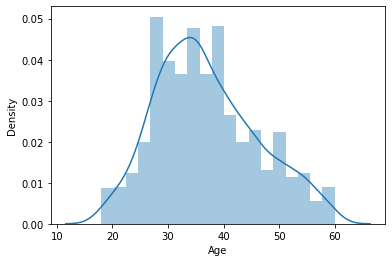

In [48]:
# checking with the distribution curve:-

sns.distplot(data['Age'])
plt.show()

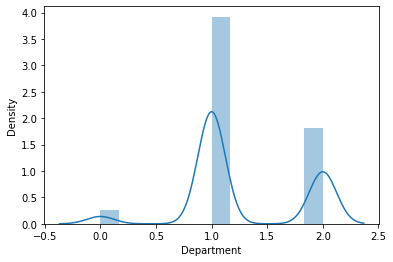

In [49]:
sns.distplot(data['Department'])
plt.show()

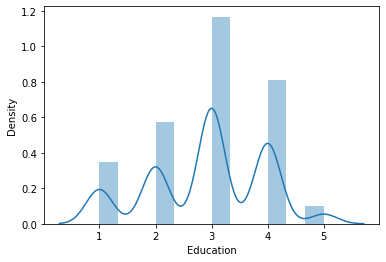

In [50]:
sns.distplot(data['Education'])
plt.show()

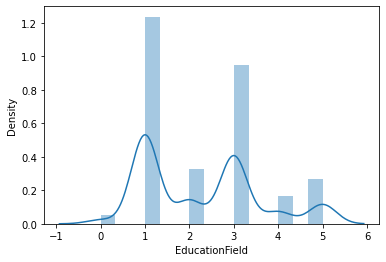

In [51]:
sns.distplot(data['EducationField'])
plt.show()

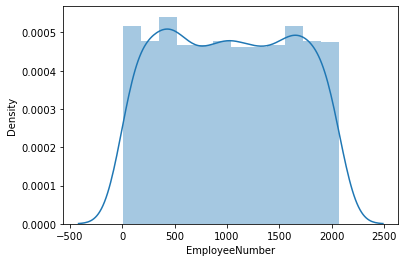

In [53]:
sns.distplot(data['EmployeeNumber'])
plt.show()

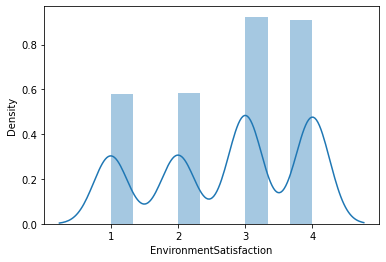

In [54]:
sns.distplot(data['EnvironmentSatisfaction'])
plt.show()

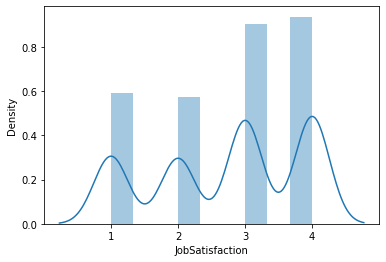

In [55]:
sns.distplot(data['JobSatisfaction'])
plt.show()

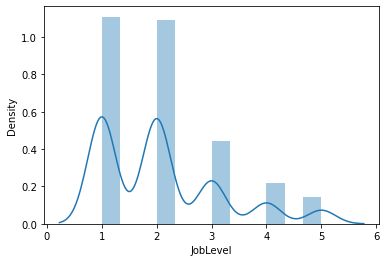

In [56]:
sns.distplot(data['JobLevel'])
plt.show()

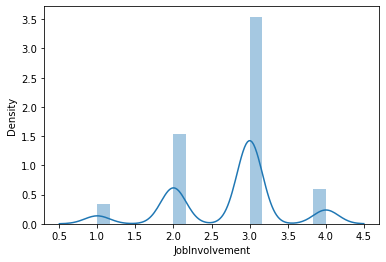

In [57]:
sns.distplot(data['JobInvolvement'])
plt.show()

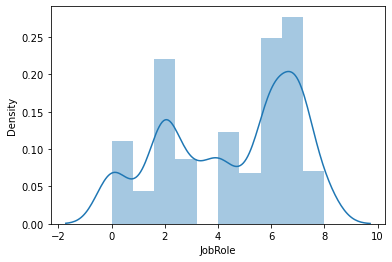

In [58]:
sns.distplot(data['JobRole'])
plt.show()

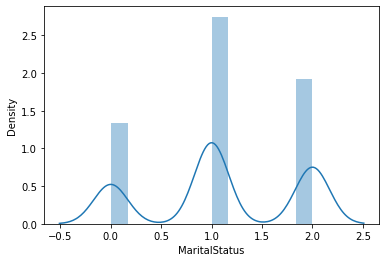

In [59]:
sns.distplot(data['MaritalStatus'])
plt.show()

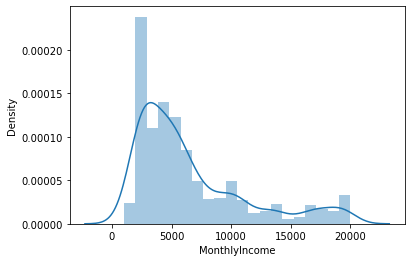

In [60]:
sns.distplot(data['MonthlyIncome'])
plt.show()

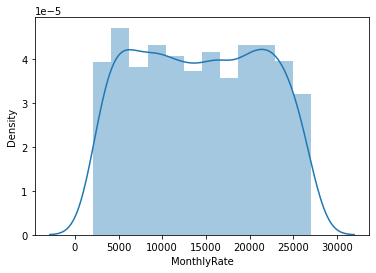

In [61]:
sns.distplot(data['MonthlyRate'])
plt.show()

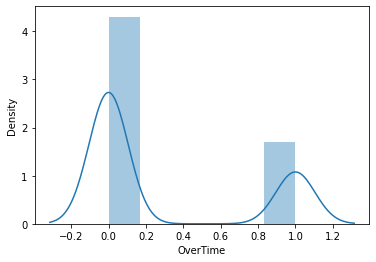

In [63]:
sns.distplot(data['OverTime'])
plt.show()

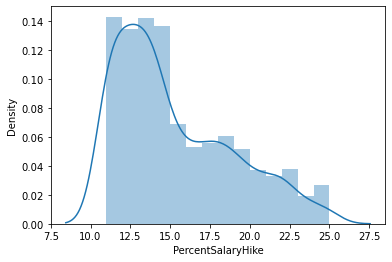

In [64]:
sns.distplot(data['PercentSalaryHike'])
plt.show()

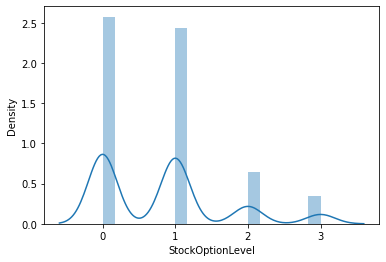

In [78]:
sns.distplot(data['StockOptionLevel'])
plt.show()

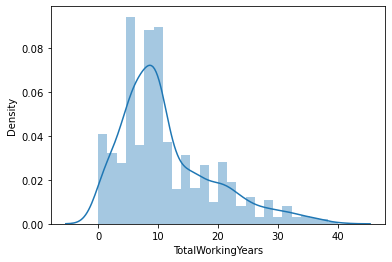

In [80]:
sns.distplot(data['TotalWorkingYears'])
plt.show()

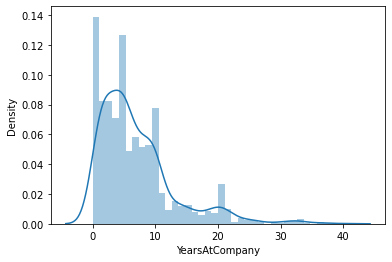

In [81]:
sns.distplot(data['YearsAtCompany'])
plt.show()

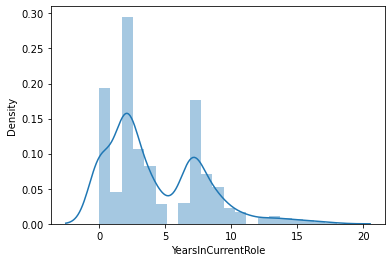

In [82]:
sns.distplot(data['YearsInCurrentRole'])
plt.show()

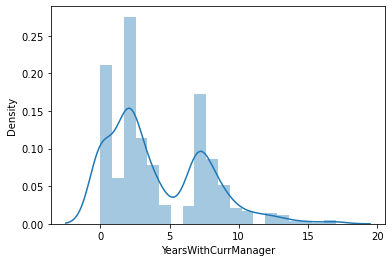

In [83]:
sns.distplot(data['YearsWithCurrManager'])
plt.show()

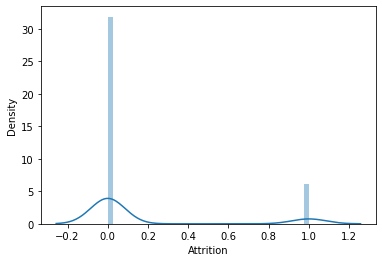

In [96]:
sns.distplot(data['Attrition'])
plt.show()

Above visualizations shows that the is not normalized.The building blocks is out of normalized curve.

# Outliers Removal:-

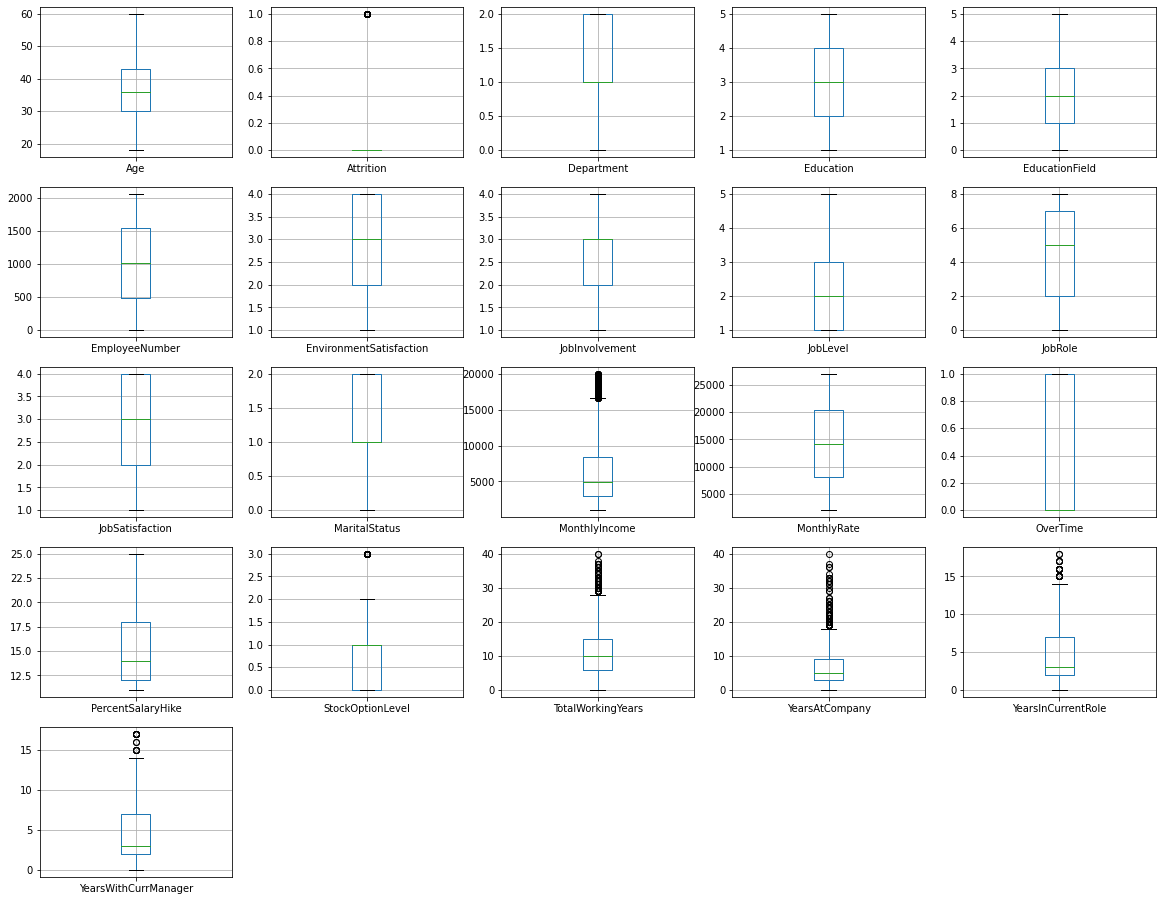

In [7]:
data.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,16),grid=True)
plt.show()

In [8]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.4463504 , 2.28090588, 1.40151234, ..., 0.16461311, 0.0632959 ,
        0.24583399],
       [1.32236521, 0.4384223 , 0.49381714, ..., 0.48850773, 0.76499762,
        0.80654148],
       [0.008343  , 2.28090588, 0.49381714, ..., 1.14429437, 1.16768726,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.49381714, ..., 0.16461311, 0.61549158,
        0.31487349],
       [1.32236521, 0.4384223 , 1.40151234, ..., 0.32522752, 0.48889978,
        1.08689522],
       [0.32016256, 0.4384223 , 0.49381714, ..., 0.49117353, 0.33939374,
        0.59522723]])

In [9]:
# index no.

np.where(z>3)

(array([  28,   62,   63,   85,   98,   98,  123,  123,  126,  126,  153,
         187,  187,  190,  190,  231,  231,  237,  270,  270,  281,  386,
         401,  411,  425,  445,  466,  473,  477,  561,  561,  592,  595,
         595,  616,  624,  635,  653,  677,  686,  716,  746,  749,  861,
         875,  894,  914,  918,  926,  956,  962,  976, 1024, 1043, 1078,
        1086, 1111, 1116, 1116, 1135, 1138, 1184, 1301, 1327, 1348, 1351,
        1401, 1430], dtype=int64),
 array([20, 18, 19, 17, 17, 18, 19, 20, 17, 18, 20, 17, 20, 18, 19, 19, 20,
        18, 17, 18, 19, 20, 17, 18, 18, 17, 19, 18, 18, 18, 20, 18, 17, 18,
        20, 17, 20, 18, 18, 20, 19, 19, 18, 18, 20, 17, 18, 18, 20, 17, 18,
        19, 19, 17, 20, 18, 18, 17, 18, 18, 18, 17, 17, 19, 20, 19, 17, 19],
       dtype=int64))

In [10]:
data_new=data[(z<3).all(axis=1)]
data_new

,Age,Attrition,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,1,1,2,3,2,7,...,2,5993,19479,1,11,0,8,6,4,5
1,49,0,1,1,1,2,3,2,2,6,...,1,5130,24907,0,23,1,10,10,7,7
2,37,1,1,2,4,4,4,2,1,2,...,2,2090,2396,1,15,0,7,0,0,0
3,33,0,1,4,1,5,4,3,1,6,...,1,2909,23159,1,11,0,8,8,7,0
4,27,0,1,1,3,7,1,3,1,2,...,1,3468,16632,0,12,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,2,3,2061,3,4,2,2,...,1,2571,12290,0,17,1,17,5,2,3
1466,39,0,1,1,3,2062,4,2,3,0,...,1,9991,21457,0,15,1,9,7,7,7
1467,27,0,1,3,1,2064,2,4,2,4,...,1,6142,5174,1,20,1,6,6,2,3
1468,49,0,2,3,3,2065,4,2,2,7,...,1,5390,13243,0,14,0,17,9,6,8


In [11]:
data.shape

(1470, 21)

In [12]:
data_new.shape

(1412, 21)

In [103]:
# percentage data loss:-

loss_percent=(1470-1412)/(1470*100)
print(loss_percent,'%')

0.0003945578231292517 %


In [13]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(data,method='yeo-johnson')
X

array([[ 0.52213976,  2.28090588,  1.37745428, ...,  0.13969235,
         0.2055623 ,  0.49014719],
       [ 1.27641097, -0.4384223 , -0.47212715, ...,  0.76265993,
         0.883888  ,  0.90963491],
       [ 0.10209148,  2.28090588, -0.47212715, ..., -2.22959153,
        -1.59643394, -1.55015588],
       ...,
       [-1.12375507, -0.4384223 , -0.47212715, ...,  0.13969235,
        -0.44664507, -0.05300033],
       [ 1.27641097, -0.4384223 ,  1.37745428, ...,  0.62882881,
         0.68299511,  1.09011007],
       [-0.23618832, -0.4384223 , -0.47212715, ..., -0.30527995,
        -0.08961473, -0.40688122]])

In [105]:
X.ndim

2

In [106]:
X.std()

1.0

In [14]:
x=data_new.drop(['Attrition'],axis=1)
x

,Age,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,2,2,1,1,2,3,2,7,4,2,5993,19479,1,11,0,8,6,4,5
1,49,1,1,1,2,3,2,2,6,2,1,5130,24907,0,23,1,10,10,7,7
2,37,1,2,4,4,4,2,1,2,3,2,2090,2396,1,15,0,7,0,0,0
3,33,1,4,1,5,4,3,1,6,3,1,2909,23159,1,11,0,8,8,7,0
4,27,1,1,3,7,1,3,1,2,2,1,3468,16632,0,12,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,2,3,2061,3,4,2,2,4,1,2571,12290,0,17,1,17,5,2,3
1466,39,1,1,3,2062,4,2,3,0,1,1,9991,21457,0,15,1,9,7,7,7
1467,27,1,3,1,2064,2,4,2,4,2,1,6142,5174,1,20,1,6,6,2,3
1468,49,2,3,3,2065,4,2,2,7,2,1,5390,13243,0,14,0,17,9,6,8


In [15]:
y=data_new['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1412, dtype: int32

# Oversampling to resolve imbalancing of the dataset:-

In [16]:
x.shape

(1412, 20)

In [17]:
y.shape

(1412,)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [20]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [21]:
y_traint

0       1
1       0
2       1
3       0
4       0
       ..
2353    1
2354    1
2355    1
2356    1
2357    1
Name: Attrition, Length: 2358, dtype: int32

In [23]:
y_traint.value_counts()

0    1179
1    1179
Name: Attrition, dtype: int64

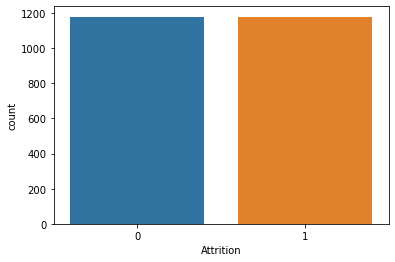

In [24]:
sns.countplot(y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing Process:-

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State:-

In [26]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.6779661016949152 random_state 1


max_accuracy 0.6779661016949152 max_random_state 1
accuracy 0.7161016949152542 random_state 2


max_accuracy 0.7161016949152542 max_random_state 2
accuracy 0.7097457627118644 random_state 3


accuracy 0.6991525423728814 random_state 4


accuracy 0.6461864406779662 random_state 5


accuracy 0.6991525423728814 random_state 6


accuracy 0.684322033898305 random_state 7


accuracy 0.7076271186440678 random_state 8


accuracy 0.6779661016949152 random_state 9


accuracy 0.7139830508474576 random_state 10


accuracy 0.6652542372881356 random_state 11


accuracy 0.6991525423728814 random_state 12


accuracy 0.7055084745762712 random_state 13


accuracy 0.7033898305084746 random_state 14


accuracy 0.7161016949152542 random_state 15


accuracy 0.690677966101695 random_state 16


accuracy 0.7076271186440678 random_state 17


accuracy 0.7182203389830508 random_state 18


max_accuracy 0.7182203389830508 max_random_state 18
accuracy 0.6949152542372882 r

In [27]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.777542372881356 on Random_state 170


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=170)

In [29]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 83.74558303886926
[[234   1]
 [ 45   3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       235
           1       0.75      0.06      0.12        48

    accuracy                           0.84       283
   macro avg       0.79      0.53      0.51       283
weighted avg       0.82      0.84      0.78       283



In [30]:
# Support vector classifier;

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 83.03886925795054
[[235   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       235
           1       0.00      0.00      0.00        48

    accuracy                           0.83       283
   macro avg       0.42      0.50      0.45       283
weighted avg       0.69      0.83      0.75       283



In [31]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 78.09187279151944
[[201  34]
 [ 28  20]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       235
           1       0.37      0.42      0.39        48

    accuracy                           0.78       283
   macro avg       0.62      0.64      0.63       283
weighted avg       0.79      0.78      0.79       283



In [32]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 84.80565371024736
[[227   8]
 [ 35  13]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       235
           1       0.62      0.27      0.38        48

    accuracy                           0.85       283
   macro avg       0.74      0.62      0.65       283
weighted avg       0.82      0.85      0.82       283



In [40]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 84.45229681978799
[[223  12]
 [ 32  16]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       235
           1       0.57      0.33      0.42        48

    accuracy                           0.84       283
   macro avg       0.72      0.64      0.67       283
weighted avg       0.82      0.84      0.83       283



Therefore, Random Forest Classifier shows the best metrics results among other models.

In [41]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.62977099 0.59923664 0.77480916 0.67557252 0.74045802 0.71755725
 0.67175573 0.7480916  0.64885496]
Mean of Cross validation score: 0.6895674300254453
Accuracy 83.74558303886926


In [43]:
# Cross Validation for  support vector classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(svc,x_traint,y_traint,cv=9)
print('Cross validation score of Support Vector Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predsvc)*100)

Cross validation score of Support Vector Classifier model: [0.58015267 0.51908397 0.61068702 0.58015267 0.64122137 0.57251908
 0.54580153 0.61450382 0.54198473]
Mean of Cross validation score: 0.5784563189143341
Accuracy 83.03886925795054


In [44]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.55343511 0.74427481 0.82061069 0.78625954 0.72900763 0.8129771
 0.75572519 0.80916031 0.69465649]
Mean of Cross validation score: 0.7451229855810009
Accuracy 78.09187279151944


In [45]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.7519084  0.77862595 0.9351145  0.8778626  0.90076336 0.90839695
 0.89312977 0.95038168 0.88931298]
Mean of Cross validation score: 0.8761662425784563
Accuracy 84.80565371024736


In [46]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_traint,y_traint,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.29389313 0.59160305 0.64503817 0.68320611 0.67938931 0.61832061
 0.70610687 0.64885496 0.46183206]
Mean of Cross validation score: 0.5920271416454623
Accuracy 84.45229681978799


Therefore the difference between cv score and r2 score in very less in case of Random Forest Classifier that is [0.877-0.848=0.029],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [47]:
RandomForestClassifier()

RandomForestClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400,500]}

In [50]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=4,
                scoring=accuracy_score)

In [51]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [53]:
rf=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x_traint,y_traint,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8618246235606731
Accuracy_Score 0.8551236749116607
Cross_Val_Score 86.18246235606732


In [54]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto')

In [ ]:
# ROC AUC plot:-

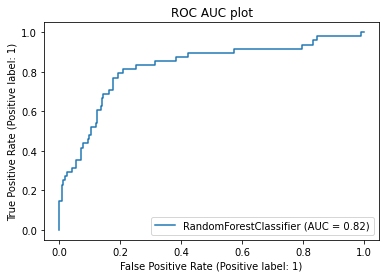

In [55]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

So, we are getting our model accuracy 85.5% and almost same cross-val-score which shows that 
our model is performing "good enough".

# Saving the Model:-

In [56]:
import pickle
filename='HR_Analytics_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [57]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
HR_attr=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
HR_attr

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
278,0,0
279,0,0
280,0,0
281,0,0
